# 《深度学习》2022-2023学年第1学期期末考试

### 姓名

王诚嘉

### 学号

2019110093

提示与建议：

1. 优先完成更有把握的题目；
2. 对于简答题，回答核心要点即可，不要提供冗长的陈述；
3. 对于编程题，优先完成整体的框架，有时间富余时再进行细节上的调试；
4. 对于综合题，每一小问的题目本身可能就是对后续问题的提示；
5. 综合题小问的难度不一定是逐渐上升的，先把题目读完，优先完成有把握的问题；
6. 可参考课件及以往的作业，但注意与考题的差异，不要生搬硬套。

### 第1题：简答题（20分）

**(a) 某信用卡公司希望建立一个深度学习模型，通过分析申请者的背景信息来决定是否发放信用卡。如果使用一个前馈神经网络来建立模型，则该神经网络的输出层应该使用什么激活函数（包括不使用激活函数）？为什么？当该公司决定为某些申请者发放信用卡后，希望再建立一个神经网络，用来决定用户的最大借款额度，那么该神经网络的输出层应该使用什么激活函数（包括不使用激活函数）？为什么？（10分）**

应该使用sigmoid激活函数，因为决定是否发放信用卡是二分类模型（发或者不发），因此可以采用sigmoid激活函数（值位于0-1之间）。
可以采用Relu激活函数或者softplus激活函数，因为最大借款额度一定是一个大于0的值，且这两类激活函数具有计算简单且梯度不饱和的性质。

**(b) 在(a)问中，建立好两个模型之后，各自可以采用什么损失函数来进行模型训练？简要叙述其理由。（5分）**

第一小问可以用逻辑回归的损失函数来进行模型训练，即取二分类模型似然函数的倒数
第二小问可以采用最小二乘思想的损失函数，即线性模型的损失函数（利用该用户最大还款额度与我们所预测的值的差来定义）

**(c) 在一个典型的前馈神经网络中，每一层的隐藏神经元都要先经过一个激活函数后再传递给下一层。是否可以让某些层不经过激活而直接传递给下一层？为什么？（5分）**

不可以，因为不用激活函数，神经元之间的传递永远是线性变换，因此该隐藏层是多余的

### 第2题：编程题（45分）

**(a) 利用 PyTorch 编写一个函数，计算 $d$ 维标准正态分布的对数密度函数 $\log[p_Z(z)]$，其中**

$$p_{Z}(z)=(2\pi)^{-d/2}\exp\left(-\frac{1}{2}\Vert z\Vert^{2}\right).$$

**该函数的输入 `z` 是一个 $n\times d$ 的矩阵，输出 `l` 是一个 $n\times 1$ 的向量，其中 `l` 的第 $i$ 个元素是 $\log[p_Z(\cdot)]$ 在 `z` 的第 $i$ 行上的取值。（5分）**

In [3]:
import torch
import math

def log_normal_pdf(z):
    Norm = torch.norm(z,dim=1)
    d = z.size()[1]
    pz = (2*math.pi)**(-d/2)*torch.exp(-1/2*Norm**2)
    l = torch.log(pz)
    return l
    # 在此处完成函数实现

# 测试结果
torch.manual_seed(2023)
z = torch.randn(5, 6)

print(z)
print(log_normal_pdf(z))

tensor([[ 0.4305, -0.3499,  0.4749,  0.9041, -0.7021,  1.5963],
        [ 0.4228, -0.6940,  0.9672,  1.5569, -2.3860,  0.6994],
        [-1.0325, -2.6043,  0.8177,  0.1459, -0.9558,  1.4745],
        [ 0.5109, -0.2325,  0.3958,  0.8536,  0.8275, -1.0542],
        [-0.7374, -0.4202,  0.3071, -1.2767,  0.2009,  0.0190]])
tensor([ -7.7096, -10.6147, -11.3267,  -7.0118,  -6.7563])


**(b) 利用 PyTorch 编写一个函数 `log_add_exp(x, y)`，其接收两个大小相同的 Tensor 作为输入（x 和 y），并逐元素计算 $f(x,y)=\log(e^x+e^y)$，最后返回一个同样大小的 Tensor。请注意计算的数值稳定性，并在如下数据上测试计算结果。PyTorch 中提供了 `torch.logaddexp()` 函数用来实现该运算，你可以使用它验证你的结果，但不能直接调用它。（10分）**

原式等价于 $\log(e^{x-y}+1)+y $ 

$\log(e^{y-x}+1)+x$

In [4]:
import torch

def log_add_exp(x, y):
    abs_m = torch.abs(x-y)
    return torch.log(torch.exp(-abs_m)+1)+ torch.max(x,y)
    # 在此处完成函数实现

# 测试结果
x = torch.tensor([-1000.0, -10.0, 0.0, 10.0, 100.0, -100.0, -10.0, 0.0, 10.0, 1000.0])
y = torch.tensor([-1000.0, -10.0, 0.0, 10.0, 100.0, 100.0, 10.0, 0.0, -10.0, -1000.0])

print(log_add_exp(x, y))
print(torch.logaddexp(x, y))

tensor([-9.9931e+02, -9.3069e+00,  6.9315e-01,  1.0693e+01,  1.0069e+02,
         1.0000e+02,  1.0000e+01,  6.9315e-01,  1.0000e+01,  1.0000e+03])
tensor([-9.9931e+02, -9.3069e+00,  6.9315e-01,  1.0693e+01,  1.0069e+02,
         1.0000e+02,  1.0000e+01,  6.9315e-01,  1.0000e+01,  1.0000e+03])


**(c) 给定矩阵 $X=(x_{ij})$ 和函数 $f(X)=\log|\det(Y'Y)|$，其中 $Y=(y_{ij})$, $y_{ij}=\log(10+\exp(x_{ij}))$，$\det(A)$ 表示方阵 $A$ 的行列式，$|\det(A)|$ 是 $\det(A)$ 的绝对值。编写 PyTorch 程序，计算 $f(X)$ 关于 $X$ 的导数在 $X=X_0$ 处的取值，其中 $X_0$ 由如下代码给出。（10分）**

In [5]:
torch.manual_seed(2023)
X0 = 100.0 * torch.randn(10, 5)
X0.requires_grad = True

# 在此处完成代码实现
Y = log_add_exp(torch.log(torch.tensor(10)),X0)
YtY = torch.matmul(Y.t(),Y)
print(YtY)
detYtY = torch.det(YtY)
print(detYtY)
f = torch.log(torch.abs(detYtY))
f.backward()
print(X0.grad)

tensor([[90314.2031,  8579.7178,  4429.4839, 20963.8457, 25978.8438],
        [ 8579.7178, 21031.3711, 19312.0215,  9452.1787, 16178.0156],
        [ 4429.4839, 19312.0215, 55385.3867,  6005.9038,  1566.2573],
        [20963.8457,  9452.1787,  6005.9038, 55093.4648, 20127.3984],
        [25978.8438, 16178.0156,  1566.2573, 20127.3984, 34475.4922]],
       grad_fn=<MmBackward0>)
tensor(3.9088e+22, grad_fn=<DetLuBasedHelperBackward0>)
tensor([[ 6.1308e-04, -1.7771e-19,  2.2686e-03,  3.7617e-03, -4.2362e-35],
        [ 7.0432e-04, -7.6684e-03,  1.7234e-34, -1.0274e-04,  1.2052e-02],
        [ 0.0000e+00,  6.0710e-03,  0.0000e+00,  0.0000e+00,  4.8538e-03],
        [ 1.9263e-09,  1.7671e-02,  0.0000e+00,  3.3121e-22, -7.0877e-03],
        [ 0.0000e+00,  7.7662e-03, -7.0065e-45,  1.5058e-32, -2.1457e-07],
        [ 0.0000e+00,  0.0000e+00, -4.4620e-04,  5.8816e-03, -7.0065e-45],
        [-5.9144e-04,  5.1088e-03,  0.0000e+00,  6.3688e-03, -3.8515e-03],
        [ 7.4336e-03,  5.7173e-43,  0.

**(d) 在有监督学习中，如果因变量的取值是非负整数，那么可以使用泊松分布来对因变量进行建模。已知泊松分布 $Y\sim Poisson(\lambda)$ 的概率质量函数为 $P(Y=y)=\lambda^y e^{-\lambda}/y!$，$y=0,1,\ldots$。对于每一个因变量观测 $Y_i$，假定它服从均值为 $\lambda_i>0$ 的泊松分布，其中 $\lambda_i$ 依赖于自变量 $x_i$：**

$$Y_i\sim Poisson(\lambda_i),\quad\lambda_i=f_\theta(x_i),$$

**这里 $f_\theta(x)$ 是一个前馈神经网络，$\theta$ 是网络的所有参数。**

**给定自变量矩阵 $X_{n\times p}$ 和因变量向量 $Y_{n\times 1}$，我们希望对神经网络的参数进行估计，使其能够尽可能贴合数据。请编写 PyTorch 程序，完成以下任务：**

1. 创建一个具有两个隐藏层的前馈神经网络用来表达 $f_\theta(x)$，其中隐藏神经元数量分别为10和3，选择合适的激活函数，尤其是输出层的激活函数（注意 $\lambda_i$ 的取值范围）；

2. 利用极大似然准则推导出该模型的损失函数，进行必要的文字说明；

3. 用程序实现损失函数，它以 `x` 和 `y` 作为参数，然后返回当前模型在输入数据上的损失函数取值。调用你编写的函数，计算它在如下模拟数据上的损失函数取值。（20分）

In [68]:
import numpy as np
# 模拟数据
torch.manual_seed(2023)
X = torch.randn(1000, 30)
Y = torch.poisson(10.0 * torch.rand(1000, 1))
Y.requires_grad = True
import torch.nn as nn

class FFN(nn.Module):
    def __init__(self, input_dim):
        super(FFN, self).__init__()
        self.fc1 = torch.nn.Linear(in_features=input_dim, out_features=10)
        self.fc2 = torch.nn.Linear(in_features=10,out_features=3)
        self.fc3 = torch.nn.Linear(in_features=3,out_features=1)

    
    def forward(self, x):
        x = self.fc1(x)
        x = torch.tanh(x)
        x = self.fc2(x)
        x = torch.tanh(x)
        x = self.fc3(x)
        x = torch.relu(x)
        
        return x
    

In [69]:
np.random.seed(123)
torch.manual_seed(123)

input_d = X.shape[1]

model = FFN(input_dim=input_d)
LambdaHat = model(X)

取倒数，连乘，取对数，去掉不含参数的log连乘项，得到：
$ l^* = \sum \lambda_i - \sum y_i \log \lambda_i$;
但注意由于这里是倒数，相当于反比关系，因此要再取一个相反数

In [70]:
import math
#可以利用泊松分布的密度函数的倒数来推出损失函数，即似然函数的倒数
def possionloss(y,Lambda):
    loglike = torch.mean(- Lambda + y*torch.log(Lambda+1e-10) ) # 极大似然
    loss =  - loglike # 等价于极小化损失
    return loss

iteration 0, loss = 117.67192840576172
iteration 5000, loss = 27.223745346069336
iteration 10000, loss = 16.995023727416992
iteration 15000, loss = 12.284420013427734
iteration 20000, loss = 10.74178695678711
iteration 25000, loss = 7.958779335021973
iteration 30000, loss = 6.519991397857666
iteration 35000, loss = 5.031817436218262
iteration 40000, loss = 3.598118782043457
iteration 45000, loss = 3.394955635070801
iteration 50000, loss = 2.4461820125579834
iteration 55000, loss = 2.2827858924865723
iteration 60000, loss = 2.157288074493408
iteration 65000, loss = 1.900415301322937
iteration 70000, loss = 1.4616949558258057
iteration 75000, loss = 1.3702839612960815
iteration 80000, loss = 1.2871809005737305
iteration 85000, loss = 1.208464503288269
iteration 90000, loss = 1.1339985132217407
iteration 95000, loss = 1.0623265504837036
[Parameter containing:
tensor([[-0.0573,  0.0162, -0.0755,  0.0441, -0.1429,  0.1578, -0.1169, -0.1450,
         -0.0952,  0.0774, -0.1128,  0.0586, -0.14

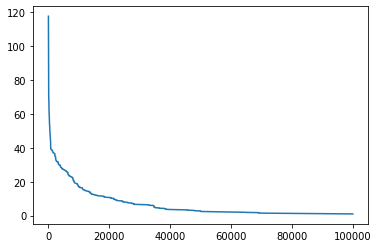

In [71]:
import matplotlib.pylab as plt

# 迭代次数
nepoch = 100000
# 学习率，即步长
learning_rate = 0.005
# 记录损失函数值
losses = []

opt = torch.optim.Adagrad(model.parameters(), lr=learning_rate)

for i in range(nepoch):
    LamHat = model(X)
    loss = possionloss(Y,LamHat)

    opt.zero_grad()
    loss.backward()
    opt.step()

    losses.append(loss.item())

    if i % 5000 == 0:
        print(f"iteration {i}, loss = {loss.item()}")

print(list(model.parameters()))
plt.plot(losses)

### 第3题：综合题（35分）

标准化流模型（normalizing flow）是一类特殊的神经网络模型（见阅读材料），其最大的特点是具有可逆性。对于一个 $d$ 维的输入 $x\in\mathbb{R}^d$，流模型可以看作是一个 $\mathbb{R}^d\rightarrow\mathbb{R}^d$ 的映射 $f_\theta$，且 $f_\theta^{-1}$ 存在，其中 $\theta$ 是该映射的参数。我们一般希望 $z=f_\theta(x)$ 和 $x=f_\theta^{-1}(z)$ 都可高效地进行计算。

流模型中一类常见的实现被称为 Real NVP，它按如下的方式定义一个基础的可逆映射 $f_\theta$：对于 $d$ 维输入 $x=(x_1,\ldots,x_d)'$，首先固定一个整数 $0<k<d$，然后令 $z=(z_1,\ldots,z_d)'=f_\theta(x)$，其中

$$\begin{align*}
z_{1:k} & =x_{1:k},\\
z_{(k+1):d} & =x_{(k+1):d}\odot\exp(\sigma(x_{1:k}))+\mu(x_{1:k}).
\end{align*}$$

换言之，$x$ 的前 $k$ 个元素保持不变，而剩下的元素 $x_{(k+1):d}$ 将乘以一个等长的向量 $v$，再加上一个等长的向量 $u$ 得到 $z_{(k+1):d}$，其中 $u$ 和 $v$ 又是前 $k$ 个元素 $x_{1:k}$ 的函数，$v=\exp(\sigma(x_{1:k}))$，$u=\mu(x_{1:k})$，此处 $\mu(\cdot)$ 和 $\sigma(\cdot)$ 是两个 $\mathbb{R}^k\rightarrow\mathbb{R}^{d-k}$ 的前馈神经网络。 

**在实际模型实现中，输入数据是一个 $n\times d$ 的矩阵 $X$，而 $f_\theta$ 将对 $X$ 的每一行进行上述变换。**

Real NVP 还有一个重要的性质，就是其雅各比矩阵的行列式具有简单的形式：

$$\log\left[\left|\det\left(\frac{\partial f_\theta}{\partial x}\right)\right|\right]=\sum_{i=1}^{d-k}\sigma_i(x_{1:k}),$$

其中 $\sigma_i(x_{1:k})$ 是 $\sigma(x_{1:k})$ 输出的第 $i$ 个元素。

**(a) 在以下小问中我们始终让 $k=\lfloor\frac{d}{2}\rfloor$，其中 $\lfloor x\rfloor$ 表示不超过 $x$ 的最大整数。请编写一个简单的函数用来计算 $k$。（3分）**

In [108]:
def get_k(d):
    k=math.floor(d/2)
    return k
    # 在此处完成函数实现

**(b) $\mu(\cdot)$ 和 $\sigma(\cdot)$ 具有相同的结构，因此我们可以定义一个统一的类，然后从这个类中生成两个前馈神经网络对象。要求该前馈神经网络的类具有两个隐藏层（不包括输入层和输出层），其神经元数量分别为32和16，使用 ReLU 作为激活函数。完成以下模块的构建。（7分）**

In [97]:
import torch.nn as nn

class FeedForward(nn.Module):
    def __init__(self, d, k):
        super(FeedForward, self).__init__()
        self.fc1 = torch.nn.Linear(in_features = k , out_features = 32)
        self.fc2 = torch.nn.Linear(in_features = 32, out_features = 16)
        self.fc3 = torch.nn.Linear(in_features = 16, out_features = d-k)
    
    def forward(self, x):
        
        x = self.fc1(x)
        x = torch.relu(x)
        x = self.fc2(x)
        x = torch.relu(x)
        x = self.fc3(x)
        x = torch.relu(x)
        
        return x

# 测试结果
torch.manual_seed(2023)
mu_fn = FeedForward(d=5, k=2)
sigma_fn = FeedForward(d=5, k=2)
x1k = torch.randn(3, 2)

print(mu_fn)
print(sigma_fn)
print(mu_fn(x1k))
print(sigma_fn(x1k))

FeedForward(
  (fc1): Linear(in_features=2, out_features=32, bias=True)
  (fc2): Linear(in_features=32, out_features=16, bias=True)
  (fc3): Linear(in_features=16, out_features=3, bias=True)
)
FeedForward(
  (fc1): Linear(in_features=2, out_features=32, bias=True)
  (fc2): Linear(in_features=32, out_features=16, bias=True)
  (fc3): Linear(in_features=16, out_features=3, bias=True)
)
tensor([[0.0772, 0.0000, 0.1758],
        [0.1746, 0.0000, 0.1949],
        [0.1221, 0.0000, 0.1793]], grad_fn=<ReluBackward0>)
tensor([[0.1531, 0.0000, 0.3252],
        [0.1426, 0.0000, 0.2933],
        [0.1256, 0.0000, 0.3138]], grad_fn=<ReluBackward0>)


**(c) 利用以上模块，编写一个 Real NVP 的模块类，用来实现标准化流模型。该模块类的 `forward()` 函数接收一个 $n\times d$ 的参数 `x`，然后返回变换的结果 `z`（$n\times d$ 的矩阵）以及雅各比矩阵的对数行列式取值 `logdet`（$n\times 1$ 的向量）。（15分）**

In [122]:
class RealNVP(nn.Module):
    def __init__(self, input_dim):
        super(RealNVP, self).__init__()
        self.mu = FeedForward(d=input_dim, k=get_k(input_dim))
        self.sig = FeedForward(d=input_dim, k = get_k(input_dim))

    def forward(self, x):
        
        d = x.shape[1]
        k = get_k(d)
        
        x1 = x[:,:k]
        x2 = x[:,k:]
        
        # get z1
        z1 = x1
        
        # get z2
        sig_out = self.sig(x1)
        X2Sig = sig_out * x2
        
        mu_out = self.mu(x1)
        X2SigMu = X2Sig + mu_out
        
        z2 = X2SigMu
        
        # concat [Z1:Z2]
        z = torch.cat((z1,z2),1)
        
        # logdet
        logdet = torch.sum(sig_out,dim=1)
        
        return z,logdet

# 测试结果
torch.manual_seed(2023)
n = 5
d = 7
x = torch.randn(n, d)
model = RealNVP(input_dim=d)
z, logdet = model(x)

print(x)
print(z)
print(logdet)

tensor([[ 0.4305, -0.3499,  0.4749,  0.9041, -0.7021,  1.5963,  0.4228],
        [-0.6940,  0.9672,  1.5569, -2.3860,  0.6994, -1.0325, -2.6043],
        [ 0.9337, -0.1050,  0.7427, -1.3397, -0.3649, -0.2325,  0.3958],
        [ 0.8536, -0.4204, -1.4516,  1.0055, -0.1263, -0.3242, -1.2767],
        [ 0.2009,  0.0190,  0.3041, -0.9213,  0.9191, -2.4946, -0.2740]])
tensor([[ 0.4305, -0.3499,  0.4749,  0.3313,  0.0542,  0.3460,  0.0000],
        [-0.6940,  0.9672,  1.5569,  0.1725,  0.0000, -0.0093,  0.0000],
        [ 0.9337, -0.1050,  0.7427,  0.4098,  0.0075,  0.1292,  0.0000],
        [ 0.8536, -0.4204, -1.4516,  0.1708,  0.2882, -0.0328,  0.0000],
        [ 0.2009,  0.0190,  0.3041,  0.2833,  0.0825, -0.1165,  0.0000]],
       grad_fn=<CatBackward0>)
tensor([0.1158, 0.1513, 0.1030, 0.2318, 0.1394], grad_fn=<SumBackward1>)


**(d) 根据阅读材料中的介绍，我们用一个流模型 $f_\theta$ 来表达一个 $d$ 维的密度函数，其中 $p_Z$ 是 $d$ 维标准正态分布的密度函数：**

$$
\log[p_{X}(x)]=\log\left[\left|\det\left(\frac{\partial f_\theta}{\partial x}\right)\right|\right]+\log[p_{Z}(f_\theta(x))].
$$

**请利用上面建立的 Real NVP 模型，计算该分布模型在 (c) 中数据 `x` 上的对数似然函数值。（5分）**

In [ ]:
# 在此处完成代码实现



In [128]:
from torch.distributions import MultivariateNormal

def log_standard_normal_pdf(x):
    """
    计算 d 维标准正态分布的概率密度函数
    :param x: d 维向量或包含多个 d 维向量的张量
    :return: 对应的概率密度
    """
    d = x.size(-1)
    # 创建一个多维标准正态分布（均值为0，协方差矩阵为单位矩阵）
    distribution = MultivariateNormal(torch.zeros(d), torch.eye(d))
    # 计算概率密度
    return distribution.log_prob(x)

x.shape
logPz = log_standard_normal_pdf(x)
logPx = logdet + logPz
print(logPx)


tensor([ -8.6021, -15.2171,  -8.1161,  -9.0880, -10.3555],
       grad_fn=<AddBackward0>)


**(e) 在上面定义的 Real NVP 模型中，$f_\theta$ 的变换输出 $z$ 的前 $k$ 个分量与输入 $x$ 的前 $k$ 个分量是完全一致的，这会使得模型的表达能力受到限制。结合阅读材料，请用文字简述有哪些方法可以增强模型的表达能力，使其能刻画更复杂的非线性关系。（5分）**

比如可以利用coupling flows，先选取一块保持不变，再利用神经网络训练另外一块在合并